In [31]:
import torch.nn as nn
import torch
import torch.optim as optim
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import scipy.spatial as scisp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import warnings 
from xgboost import XGBClassifier
import seaborn as sns
warnings.filterwarnings("ignore")
from scipy.stats import spearmanr

In [7]:
X = pd.read_csv("x_trianing_data.csv", index_col = 0)

In [13]:
y = pd.read_csv("y_training_data.csv", index_col = 0)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2)

In [57]:
hm = X.drop("fips",1)

In [58]:
correlation_mat = np.zeros([len(hm.columns), len(hm.columns)])

In [59]:
for i in range(correlation_mat.shape[0]):
    for j in range(correlation_mat.shape[1]):
        correlation_mat[i, j] = spearmanr(hm[hm.columns[i]], hm[hm.columns[j]])[0]

In [60]:
cor_mat = pd.DataFrame(correlation_mat, columns = hm.columns)

In [61]:
cor_mat.index = hm.columns

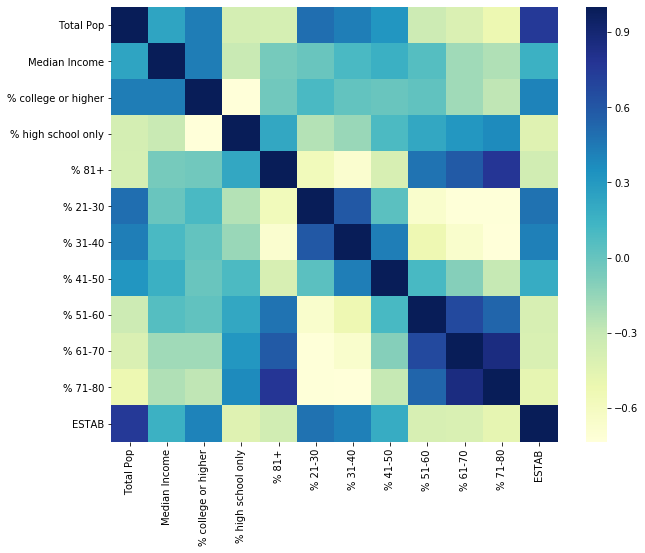

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, cmap="YlGnBu")

In [54]:
def accuracy(pred, truth):
    return np.average(pred == truth)

# def confusion_matrix(pred, truth):
#     TP = pred == truth and pred == True 

def cross_validation(X, y, k = 10):
    assert(len(X) == len(y))
    kf = KFold(n_splits=k)
    turn = 0
    acc = []
    for train_index, test_index in kf.split(X):
        turn += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
####### Random Forest  
#         random_forst_clf = RandomForestClassifier()
#         random_forst_clf.fit(X_train, y_train)

####### Random Forest 
#         lm =  LogisticRegression()
#         lm.fit(X_train, y_train) 


####### XGBoost 
        xgb = XGBClassifier()
        xgb.fit(X_train, y_train)
        val = accuracy(xgb.predict(X_test), y_test)
        acc.append(val)
        print("At round {}, model has accuracy {}".format(turn, val))
    print("The model has total average accuracy of {}".format(np.mean(acc)))

In [64]:
# cross_validation(X, y)

In [66]:
# # train random forst model
# random_forst_clf = RandomForestClassifier()
# random_forst_clf.fit(X_train, y_train)
# # print(random_forst_clf.predict(X_test) == y_test)
# accuracy(random_forst_clf.predict(X_test), y_test)
# feature_importance = sorted(zip(map(lambda x: round(x, 4), random_forst_clf.feature_importances_), X_train.columns[1:]), reverse=True)

In [242]:
print(feature_importance)

[(0.1026, 'Median Income'), (0.0861, '% 81+'), (0.084, 'Total Pop'), (0.0766, '% high school only'), (0.0763, '% 21-30'), (0.0746, '% 61-70'), (0.0733, 'ESTAB'), (0.0712, '% 71-80'), (0.0697, '% 41-50'), (0.0672, '% 51-60'), (0.0663, '% college or higher'), (0.0642, '% 31-40')]


In [252]:
feature_importance = np.array(feature_importance)

In [269]:
feature_importance[:,1]

array(['Median Income', '% 81+', 'Total Pop', '% high school only',
       '% 21-30', '% 61-70', 'ESTAB', '% 71-80', '% 41-50', '% 51-60',
       '% college or higher', '% 31-40'], dtype='<U32')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

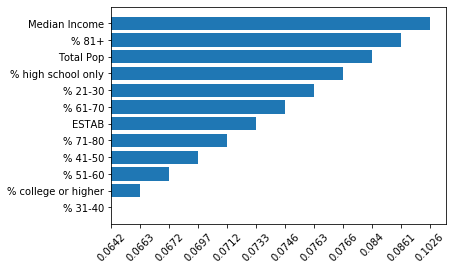

In [274]:
plt.barh(feature_importance[::-1,1], feature_importance[::-1,0])
plt.xticks(rotation=45)

In [80]:
# train random forst model
random_forst_clf = LogisticRegression()
random_forst_clf.fit(X_train, y_train)
# print(random_forst_clf.predict(X_test) == y_test)
accuracy(random_forst_clf.predict(X_test), y_test)

0.5497122855245838

In [78]:
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# # print(random_forst_clf.predict(X_test) == y_test)
# accuracy(xgb.predict(X_test), y_test)

0.49890505422311265

In [136]:
prediction = random_forst_clf.predict(X_test)
# for i in range(prediction):
#     recall = 0
#     precision = 0
#     F1 = 0
#     matching = [prediction == 12 and prediction == X_test].sum()
matching_a = (y_test == 11).astype(int)
matching_b = (prediction == y_test).astype(int)
TP = np.sum(matching_a * matching_b)
print(TP)

mis = (prediction != y_test).astype(int)
FN = np.sum(matching_a * mis)
print(FN)
recall = TP / (TP + FN)

matching_c = (prediction == 11).astype(int)
FP = np.sum(matching_c * mis)
print(FP)

TN = np.sum(matching_b * (1 - matching_a))
print(TN)

precision = TP / (TP + FP)


# precision = (predicin)
# mismatching = (prediction == 11).astype(int)

#         recall = precision
F1 = 2 * precision * recall / (precision + recall)

187944
4264
147834
825


In [139]:
# y_test
precision
# recall


0.5597269624573379

In [ ]:
precision

In [137]:
F1

0.7119279677870247